In [3]:
!pip install rasterio geopandas

In [4]:
!pip install matplotlib
import rasterio
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

In [5]:
b1 = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B1.TIF').read()
BLUE = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B2.TIF').read()
GREEN = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B3.TIF')
RED = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B4.TIF')
NIR = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B5.TIF')
SWIR1 = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B6.TIF').read()
SWIR2 = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B7.TIF').read()
b8 = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B8.TIF').read()
b9 = rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B9.TIF').read()

In [21]:
#TCC
tcc = np.stack((NIR,RED,BLUE), axis=-1)

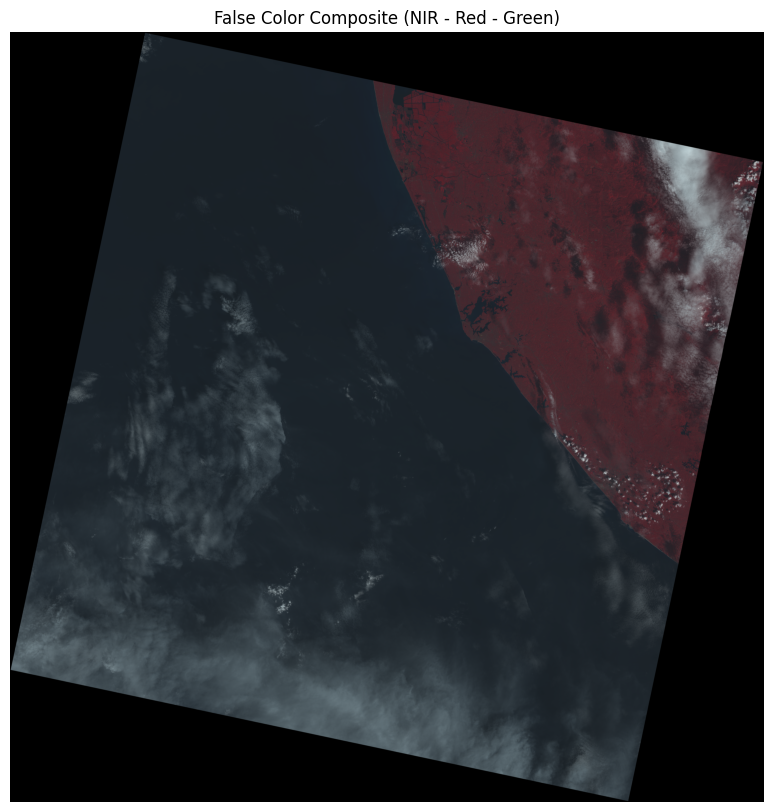

In [8]:
with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B3.TIF') as green:
    GREEN = green.read(1).astype('float32')
with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B4.TIF') as red:
    RED = red.read(1).astype('float32')
with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B5.TIF') as nir:
    NIR = nir.read(1).astype('float32')

def normalize(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))

red_norm = normalize(RED)
green_norm = normalize(GREEN)
nir_norm = normalize(NIR)

# Stack bands as FCC (NIR in Red, Red in Green, Green in Blue)
fcc_image = np.dstack((nir_norm, red_norm, green_norm))

# Plot the FCC
plt.figure(figsize=(10, 10))
plt.imshow(fcc_image)
plt.title('False Color Composite (NIR - Red - Green)')
plt.axis('off')
plt.show()


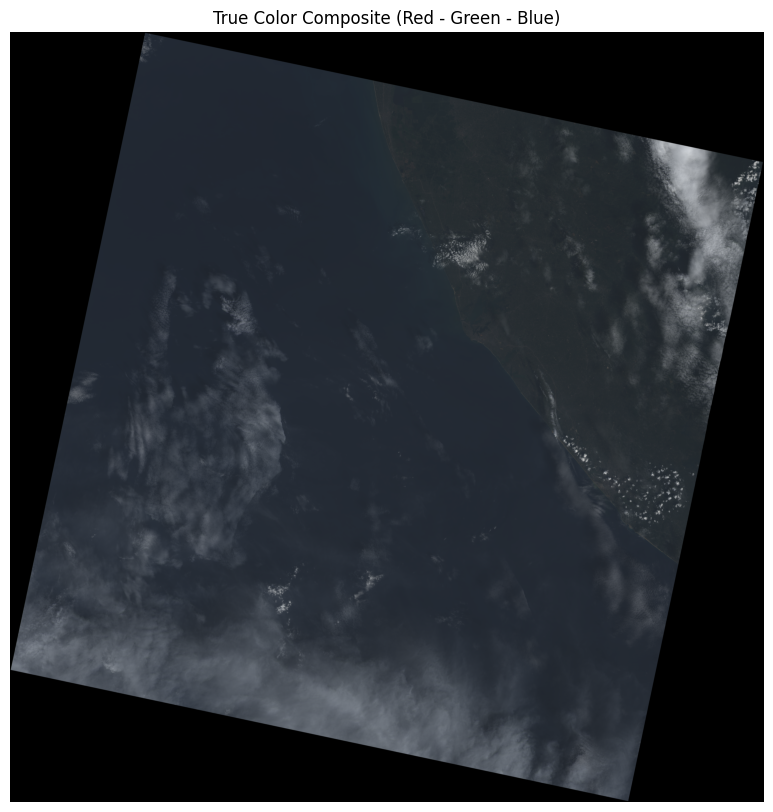

In [9]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt


with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B4.TIF') as red:   # Band 4 = Red
    RED = red.read(1).astype('float32')
with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B3.TIF') as green: # Band 3 = Green
    GREEN = green.read(1).astype('float32')
with rasterio.open('/content/LC08_L1TP_144054_20250124_20250130_02_T1_B2.TIF') as blue:  # Band 2 = Blue
    BLUE = blue.read(1).astype('float32')


def normalize(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))


red_norm = normalize(RED)
green_norm = normalize(GREEN)
blue_norm = normalize(BLUE)

# Stack bands to form a True Color Composite (R-G-B)
tcc_image = np.dstack((red_norm, green_norm, blue_norm))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(tcc_image)
plt.title('True Color Composite (Red - Green - Blue)')
plt.axis('off')
plt.show()


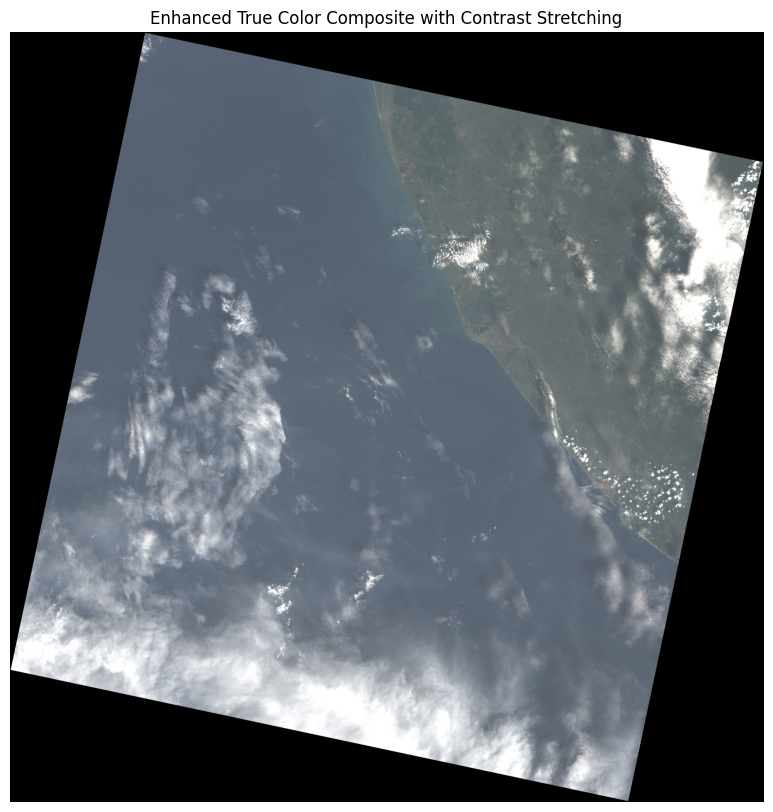

In [10]:
def contrast_stretch(band, lower_percent=2, upper_percent=98):
    p_low, p_high = np.percentile(band, (lower_percent, upper_percent))
    stretched = np.clip((band - p_low) / (p_high - p_low), 0, 1)
    return stretched

# Apply contrast stretching to the original bands (already float32 arrays)
red_stretched = contrast_stretch(RED)
green_stretched = contrast_stretch(GREEN)
blue_stretched = contrast_stretch(BLUE)

# Stack the contrast-enhanced bands
tcc_stretched_image = np.dstack((red_stretched, green_stretched, blue_stretched))

# Plot enhanced True Color Composite
plt.figure(figsize=(10, 10))
plt.imshow(tcc_stretched_image)
plt.title('Enhanced True Color Composite with Contrast Stretching')
plt.axis('off')
plt.show()
